# Interpretability 10B: swap

The multitask parity problem has 10 input bits $(x_1, x_2, \cdots, x_{10})$, $x_i\in\{0,1\}$.

The are five output bits $y_1, \cdots, y_5$, where $y_i = x_{2i-1} + x_{2i-1} ({\rm mod} 2)$

In [1]:
from kan import *

model = KAN(width=[10,10,5], seed=5)
x = torch.normal(0,1,size=(100,2))

#f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]])+x[:,[1]]**2)
f = lambda x: torch.cat([x[:,[0]] + x[:,[1]], x[:,[2]] + x[:,[3]], x[:,[4]] + x[:,[5]], x[:,[6]] + x[:,[7]], x[:,[8]] + x[:,[9]]], dim=1)
dataset = create_dataset(f, n_var=10)
model.fit(dataset, steps=5, lamb=1e-2, reg_metric='edge_forward_n');


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.19e-02 | test_loss: 7.02e-02 | reg: 1.90e+01 | : 100%|█| 5/5 [00:06<00:00,  1.21s/it

saving model version 0.1


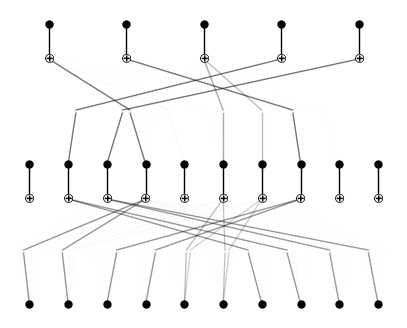

In [2]:
model.plot()

In [3]:
model.auto_swap()

saving model version 0.2


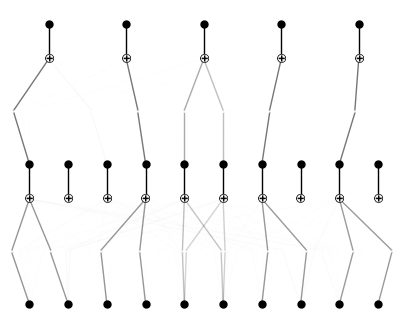

In [4]:
model.plot()

In [7]:
from kan import *

inputs = []
for i in range(2**10):
    string = "{0:b}".format(i)
    sample = [int(string[i]) for i in range(len(string))]
    sample = (10 - len(sample)) * [0] + sample
    inputs.append(sample)
   
inputs = np.array(inputs).astype(np.float32)
labels = np.sum(inputs.reshape(2**10,5,2), axis=2) % 2
inputs = torch.tensor(inputs)
labels = torch.tensor(labels)


num = inputs.shape[0]
ratio = 0.8
train_num = int(num*ratio)
train_id = np.random.choice(num, train_num, replace=False)
test_id = list(set(range(num)) - set(train_id))

dataset = {}
dataset['train_input'] = inputs[train_id]
dataset['test_input'] = inputs[test_id]
dataset['train_label'] = labels[train_id]
dataset['test_label'] = labels[test_id]

model = KAN(width=[10,10,5], seed=5)
model.fit(dataset, steps=20, lamb=1e-3, reg_metric='edge_forward_n');

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.15e-03 | test_loss: 5.12e-03 | reg: 1.67e+01 | : 100%|█| 20/20 [00:23<00:00,  1.20s/

saving model version 0.1


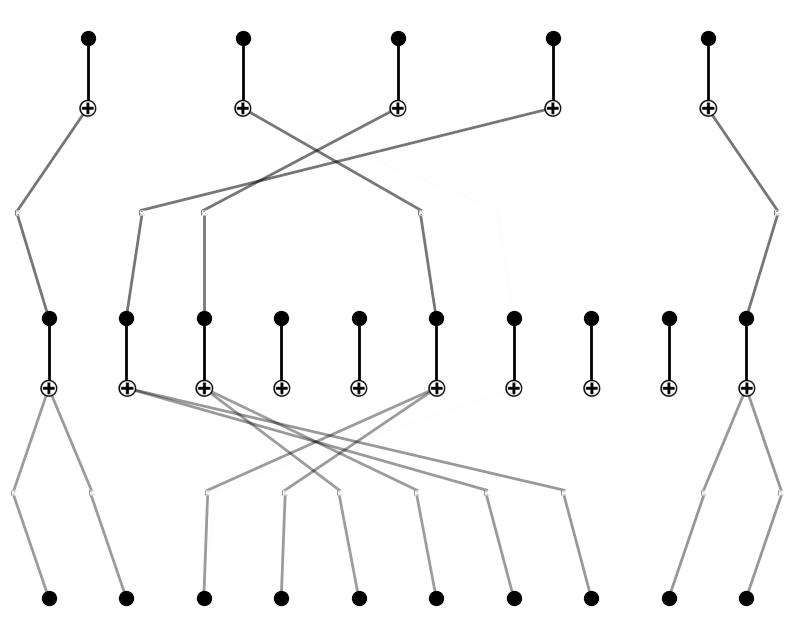

In [8]:
model.plot(scale=1.0)

In [9]:
model.auto_swap()

saving model version 0.2


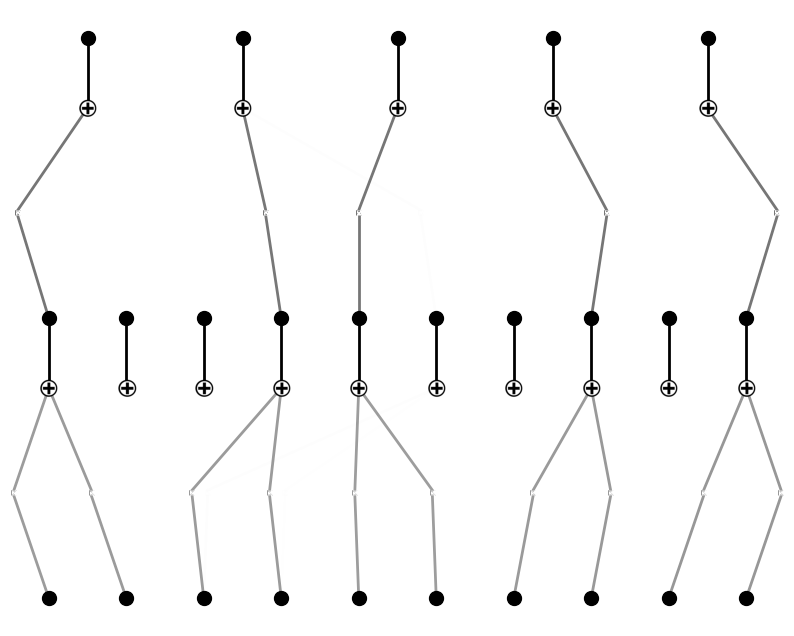

In [10]:
model.plot(scale=1.0)

In [1]:
# MLP
from kan import *
from kan.MLP import MLP

inputs = []
for i in range(2**10):
    string = "{0:b}".format(i)
    sample = [int(string[i]) for i in range(len(string))]
    sample = (10 - len(sample)) * [0] + sample
    inputs.append(sample)
   
inputs = np.array(inputs).astype(np.float32)
labels = np.sum(inputs.reshape(2**10,5,2), axis=2) % 2
inputs = torch.tensor(inputs)
labels = torch.tensor(labels)


num = inputs.shape[0]
ratio = 0.8
train_num = int(num*ratio)
train_id = np.random.choice(num, train_num, replace=False)
test_id = list(set(range(num)) - set(train_id))

dataset = {}
dataset['train_input'] = inputs[train_id]
dataset['test_input'] = inputs[test_id]
dataset['train_label'] = labels[train_id]
dataset['test_label'] = labels[test_id]

model = MLP(width=[10,20,5], seed=5)
model.fit(dataset, steps=100, lamb=2e-4, reg_metric='w');

| train_loss: 4.24e-03 | test_loss: 4.40e-03 | reg: 5.42e+01 | : 100%|█| 100/100 [00:04<00:00, 21.93


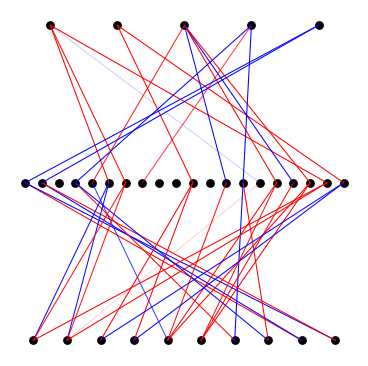

In [2]:
model.plot(scale=1.5)

In [3]:
model.auto_swap()

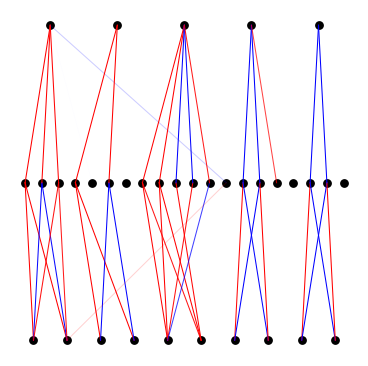

In [4]:
model.plot(scale=1.5)

In [7]:
model.auto_swap()

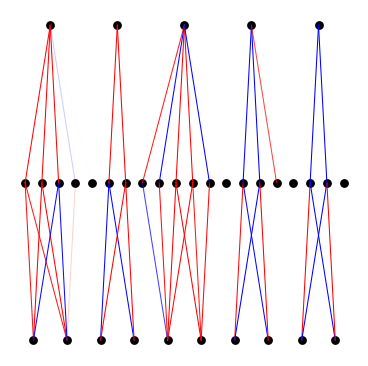

In [8]:
model.plot(scale=1.5)

In [28]:
model.auto_swap()

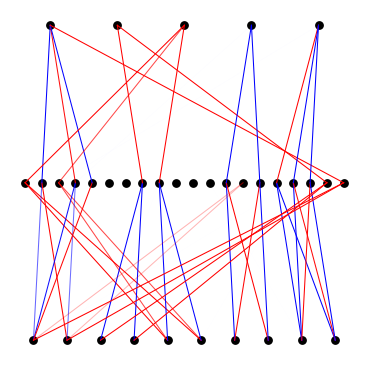

In [29]:
model.plot(scale=1.5)

In [30]:
model.connection_cost

tensor(-11.2142)